In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

In [178]:
with open('vectorized.pkl', 'rb') as f:
    data = pickle.load(f)

In [179]:
data.head()

type                                              posts  \
0  INFJ  moment sportscenter top prankswhat lifechangin...   
1  ENTP  lack post alarming.sex bore position . example...   
2  INTP  good course blessing positive good friend amaz...   
3  INTJ  dear conversation day . esoteric gabbing natur...   
4  ENTJ  silly misconception . approach key unlocking e...   

                                             vectors  
0  [[0.29492, 0.56874, -0.20245, 0.50244, -0.6829...  
1  [[-0.45433, 1.0234, 0.024278, -0.086367, -0.69...  
2  [[-0.37628, 0.37102, 0.32594, -0.085084, -0.55...  
3  [[-0.91091, 0.50459, 0.058175, -0.78618, 0.088...  
4  [[0.13739, 0.77891, 0.80054, 0.13819, -0.49792...

In [180]:
#remove numbers
data['posts'].replace('\d+', '', regex=True, inplace=True)

In [181]:
#remove unwanted spaces
def remove_unwanted_space(text):
    val1 = '.'
    sentences = text.split('.')
    updated_sentences = []
    for sentence in sentences:
        updated_sentences.append(sentence.strip())
    try:
        while True:
            updated_sentences.remove(val1)
    except ValueError:
        pass
    val2 = ''
    try:
        while True:
            updated_sentences.remove(val2)
    except ValueError:
        pass
    updated_text = ". ".join(updated_sentences)
    return updated_text

In [182]:
data['posts'] = data['posts'].apply(lambda x: remove_unwanted_space(x))

In [183]:
data['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

C:\Users\gmdiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



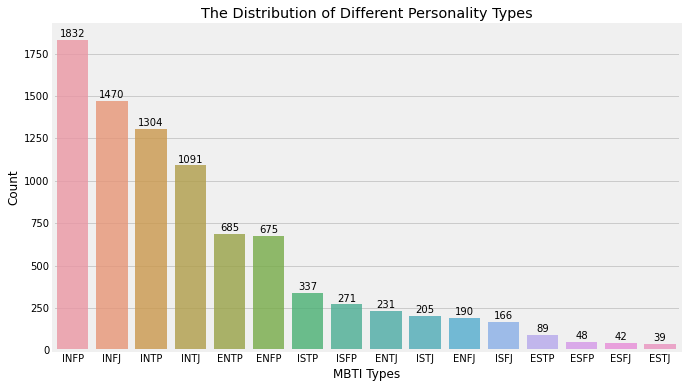

In [184]:
x = data.type.value_counts()
plt.figure(figsize=(10,6))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title('The Distribution of Different Personality Types')
plt.ylabel('Count')
plt.xlabel('MBTI Types')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [185]:
data['polarity'] = data['posts'].map(lambda x:TextBlob(x).sentiment.polarity)

C:\Users\gmdiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



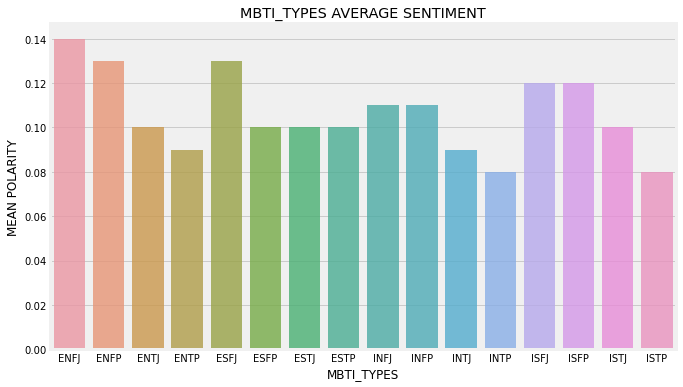

In [186]:
x = round(data.groupby('type')['polarity'].mean(), 2)
plt.figure(figsize=(10,6))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("MBTI_TYPES AVERAGE SENTIMENT")
plt.ylabel('MEAN POLARITY')
plt.xlabel('MBTI_TYPES')
plt.show()

In [187]:
data['subjectivity'] = data['posts'].map(lambda x:TextBlob(x).sentiment.subjectivity)

C:\Users\gmdiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



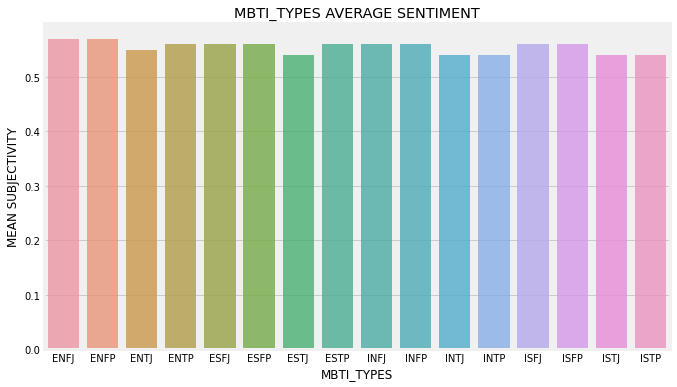

In [188]:
x = round(data.groupby('type')['subjectivity'].mean(), 2)
plt.figure(figsize=(10,6))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("MBTI_TYPES AVERAGE SENTIMENT")
plt.ylabel('MEAN SUBJECTIVITY')
plt.xlabel('MBTI_TYPES')
plt.show()

In [189]:
def generate_wordcloud(text, title):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize = 40)
    plt.show()

In [190]:
df_by_personality = data.groupby("type")['posts'].apply(' '.join).reset_index()

In [191]:
fig, ax = plt.subplots(len(data['type'].unique()), sharex=True, figsize=(15,10*len(data['type'].unique())))

k = 0
for i in data['type'].unique():
    df_4 = data[data['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

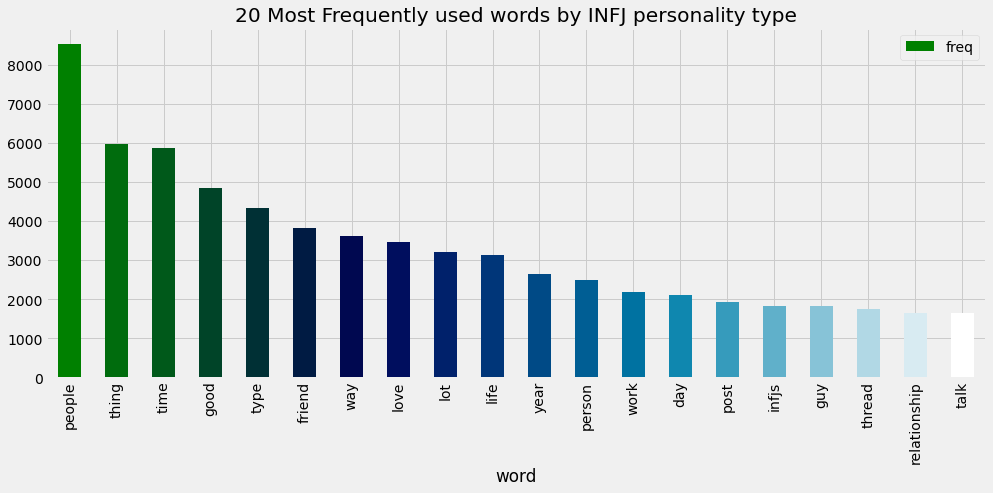

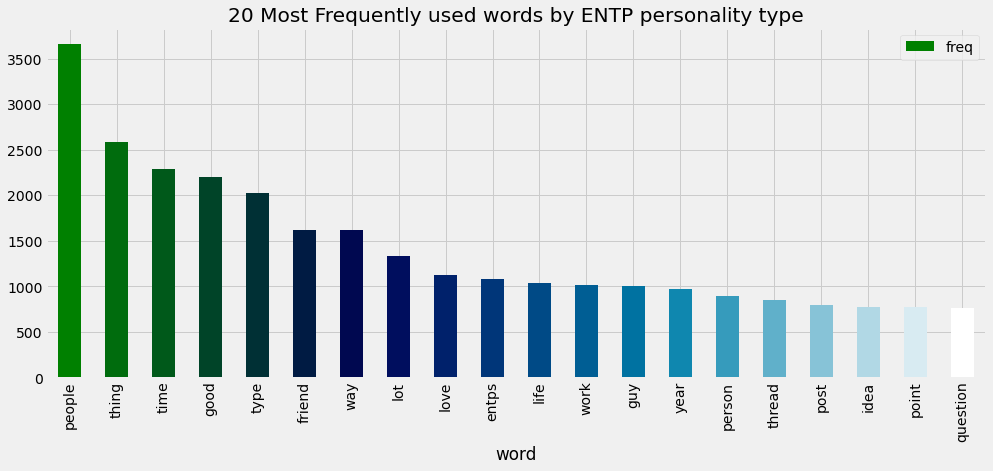

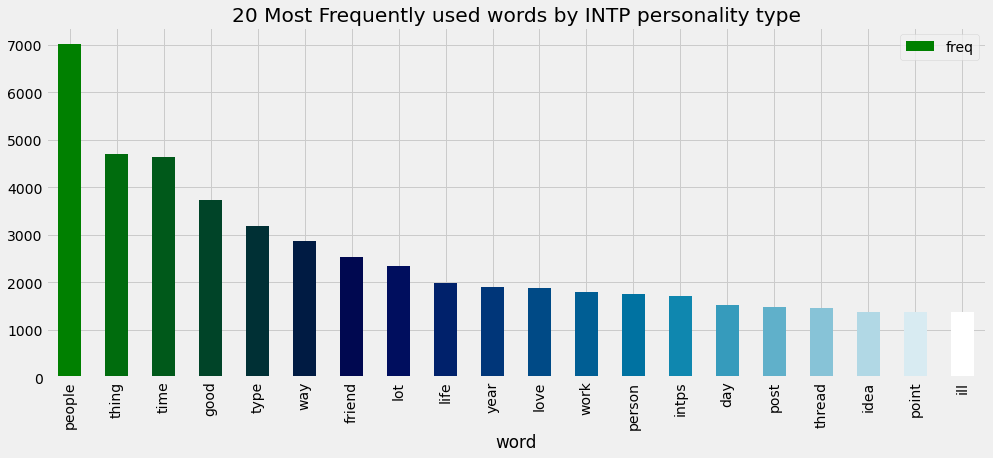

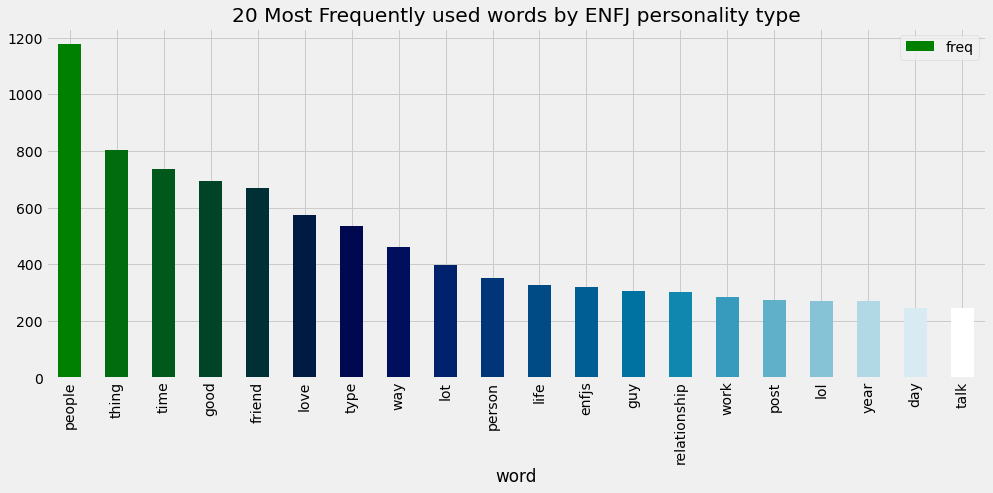

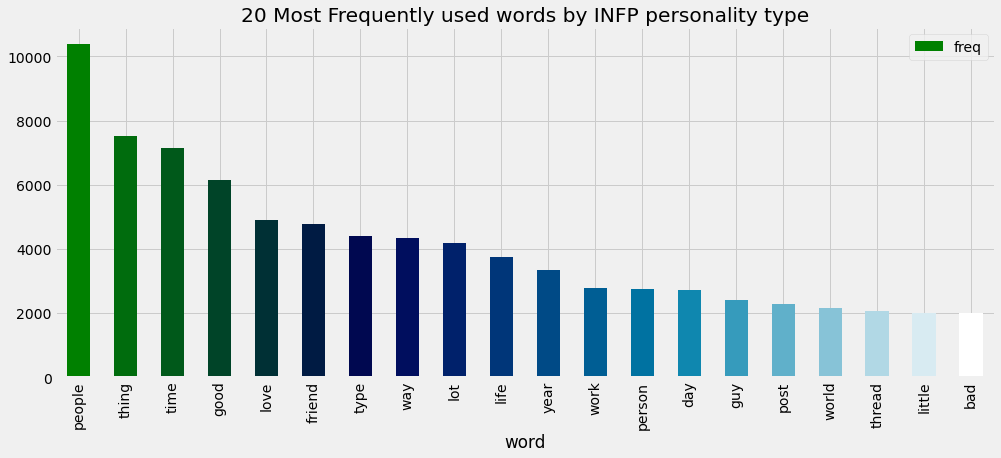

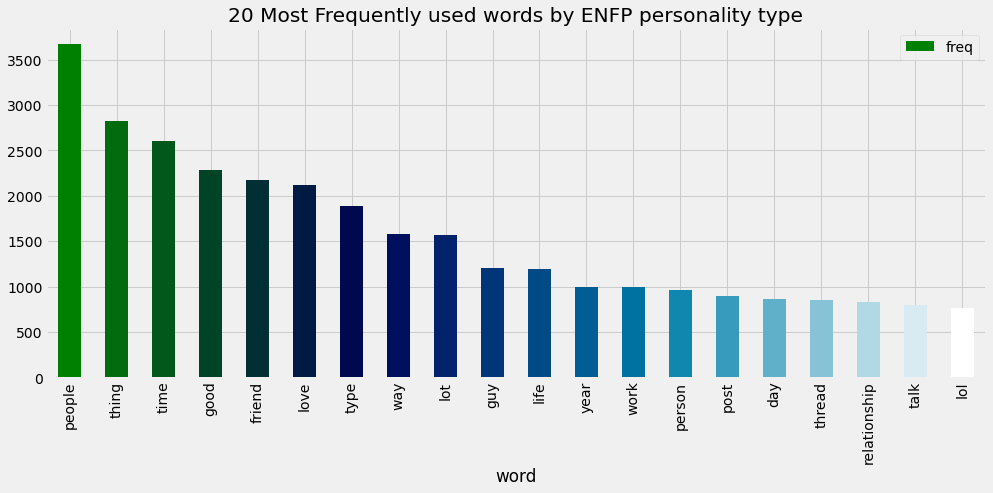

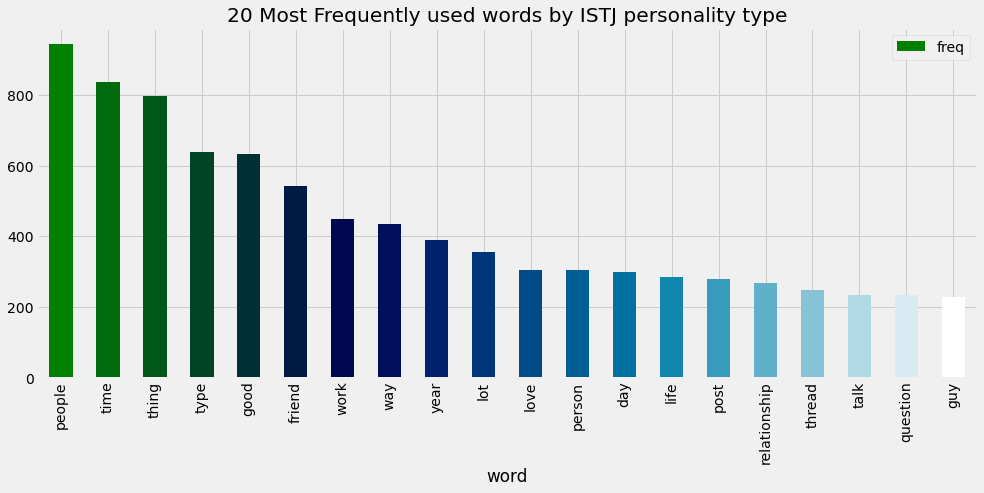

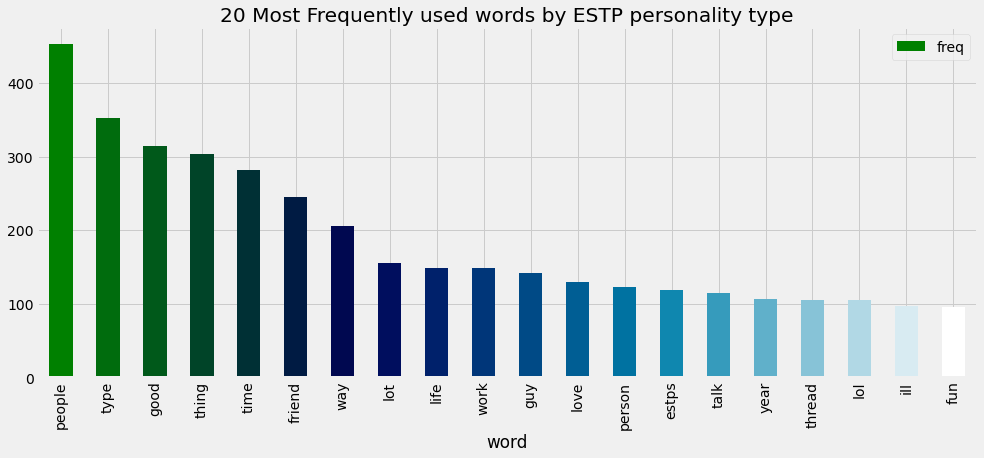

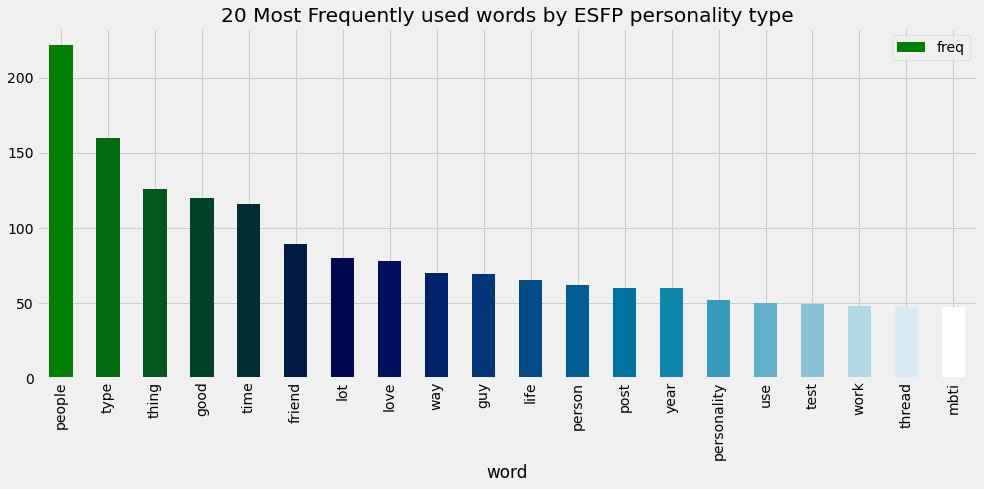

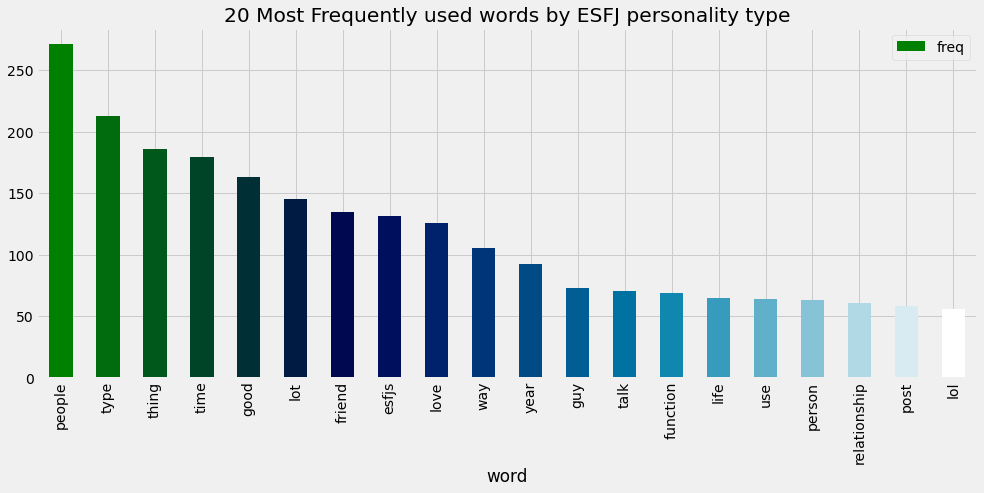

In [192]:
for i in data['type'].unique():
    cv = CountVectorizer(stop_words = 'english')
    words = cv.fit_transform(data[data['type'] == i].posts)
    sum_words = words.sum(axis=0)


    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

    plt.style.use('fivethirtyeight')
    color = plt.cm.ocean(np.linspace(0, 1, 20))
    frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
    plt.title("20 Most Frequently used words by {} personality type".format(i))
    plt.show()

In [193]:
px.pie(data,names='type',title='PERSONALITY TYPE',hole=0.3)

In [194]:
data['word_count'] = data['posts'].apply(lambda x: len(x.split()))
data['char_count'] = data['posts'].apply(len)

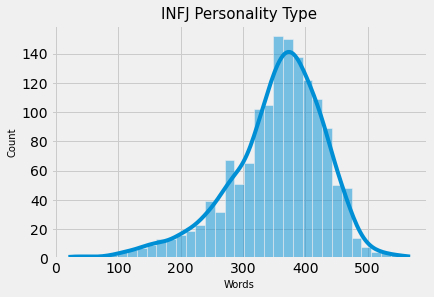

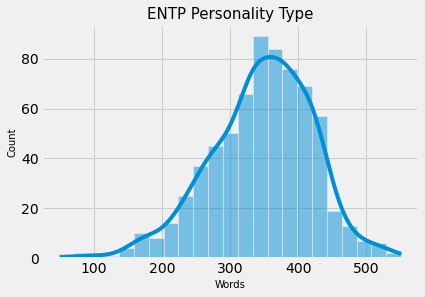

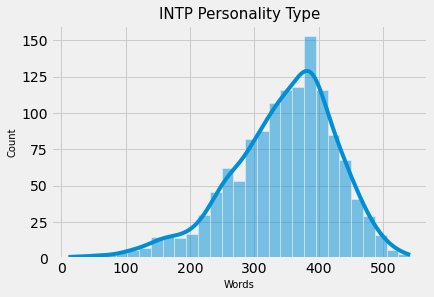

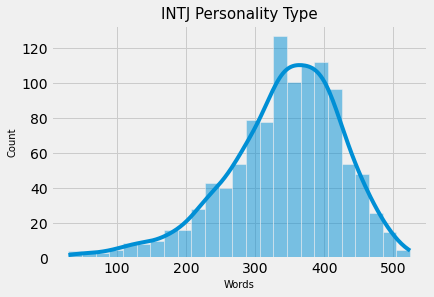

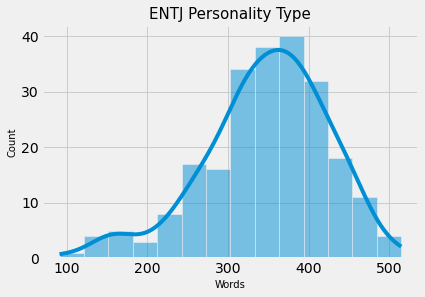

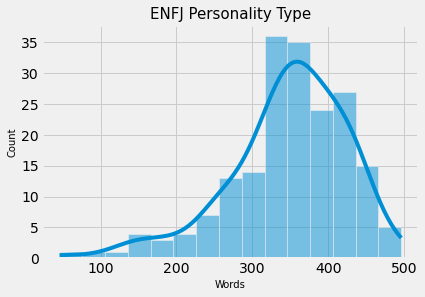

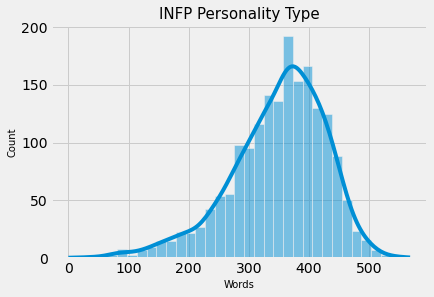

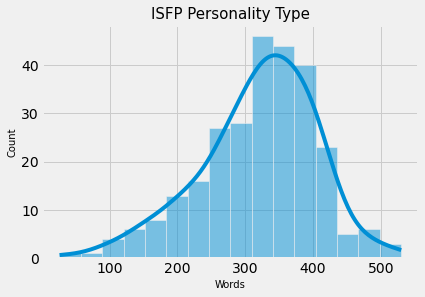

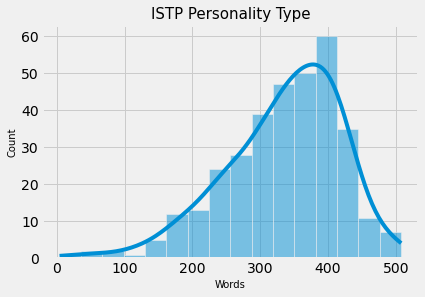

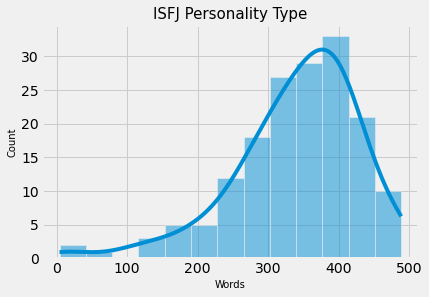

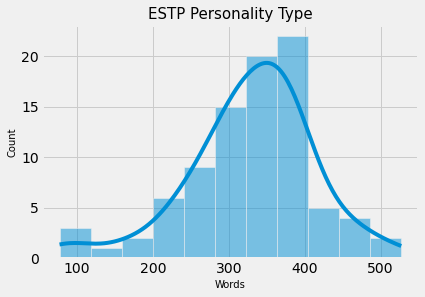

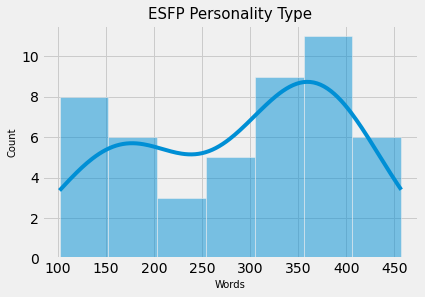

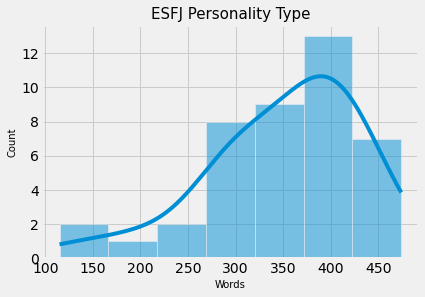

In [208]:
for i in data['type'].unique():
    sns.histplot(data=data[data['type'] == i]['word_count'], kde=True)
    plt.title("{} Personality Type".format(i), fontsize=15)
    plt.xlabel('Words', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.show()

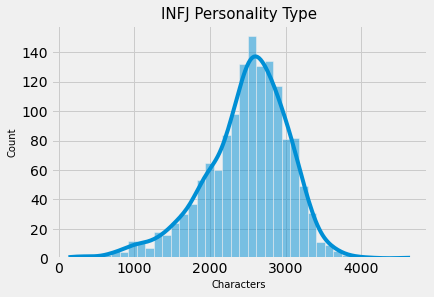

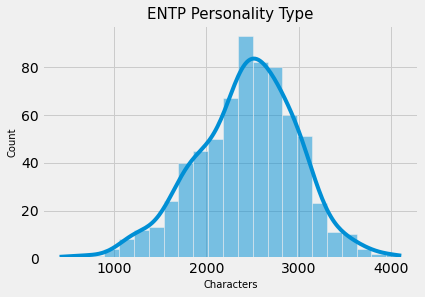

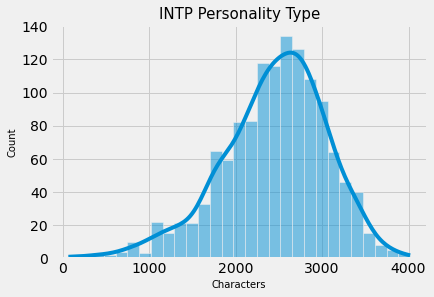

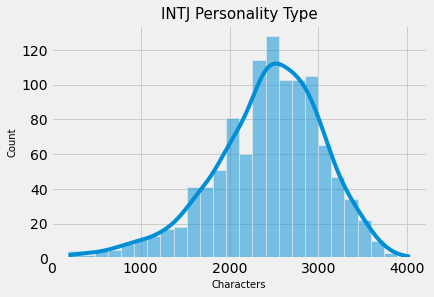

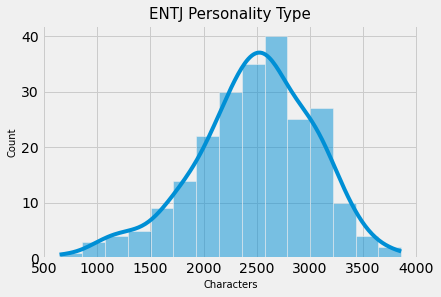

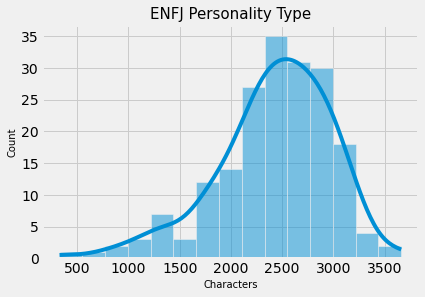

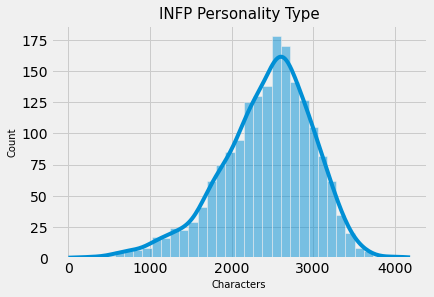

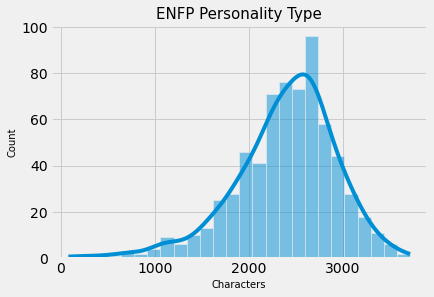

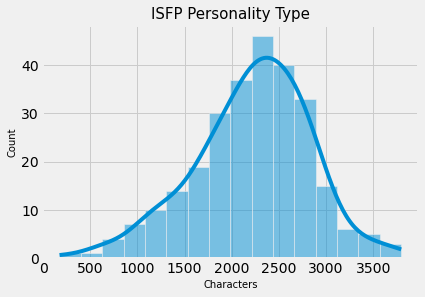

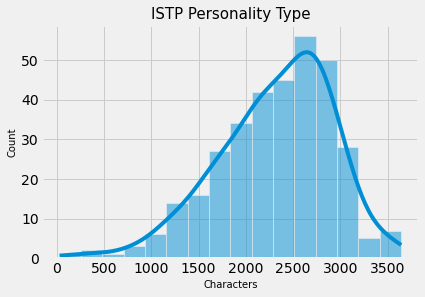

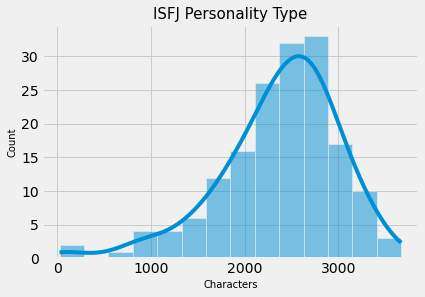

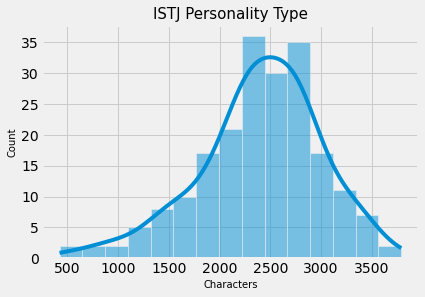

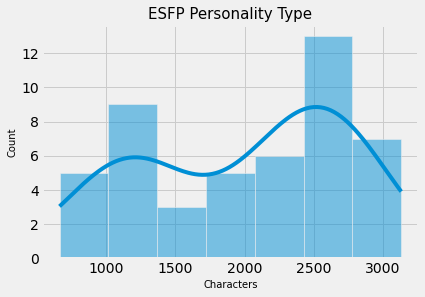

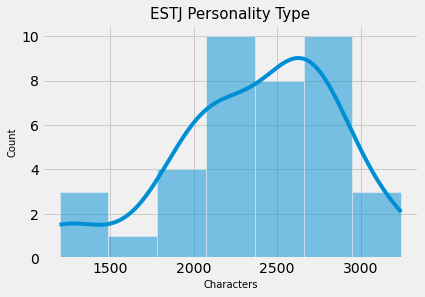

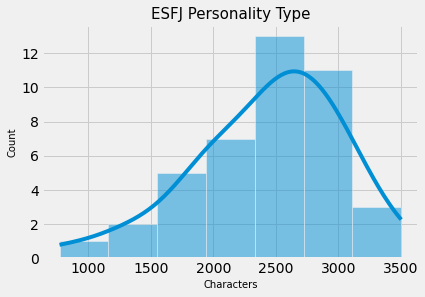

In [207]:
for i in data['type'].unique():
    sns.histplot(data=data[data['type'] == i]['char_count'], kde=True)
    plt.title("{} Personality Type".format(i), fontsize=15)
    plt.xlabel('Characters', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.show()